## Newton Raphson

Newton-Raphson is one of the numerical method to solve a root of a nonlinear function. The idea of this method is based on the linear approximation. If the function of $f(x)$ is differentiable, then the tangent line at a point of $x_n$ can be used to estimate the root of the function. The mathematical approximation of this method is derived from the equation of the tangent line

**Equation 1**

$x_{n+1} = x_n - \frac{f(x_n)} {f'(x_n)}$

where the

- $x_{n+1}$ is the next root approximation
- $x_{n}$ is the current root approximation
- $f(x_n)$ is the value of the function at $x_n$
- $f'(x_n)$ is the derivative value of the function at $x_n$

This method is one of the most efficient method for finding a root due to its rapid convergence quadratically.

### Stopping Criteria

We can use the relative error criterion for the stopping iteration process.

- First, we define the tollerance error, $e_{tol}$
- Second, give the first the guess value of $x_n$
- Third, calculate the relative error by using te following equation


**Equation 2**

$e_{rel} = |\frac{x_{n+1} - x_n} {x_{n+1}}| \le e_{tol}$

if the $e_{rel}$ is less than $e_{tol}$, the process will be stopped.

### Algorithm of Newton-Raphson

1. Define the stopping criteria, $e_{tol}$
2. Define the initial guess value of a root value, $x_n$
3. Define the function
4. Define the first derivative of function
5. While the relative error is greater than tollerance error, Calculate the next root approximation, $x_{n+1}$, by using Equation 1 and initial geuess value
6. Calcualte the relative error by using Equation 2, if the relative error is less than and equal to stopping criteria, then the process is stopped. The current $x_n$ will be considered as a root.
7. Otherwise, the calculation will be repeated for the next approximation value, $x_{n} = x_{n+1}$

**NOTE:** The Newton-Raphson require a first derivative of a given function. We then need to differentiate it against $x_n$.


### Case 1

There is a function of $f(x) = x^2 - 4 = 0$. Find its root using the Newton-Raphson method. Note, as we know that this function has a root of $-2$ or $2$ (two different signs). Let us try with the initial guess value of $3$.

First, we solve the first derivative of above function, where

$f'(x) = \frac {df(x)} {dx} = \frac {d (x^2 - 4)} {dx} = 2x$

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def newtonraphson(f,f1d,xn,e_rel=1,e_tol=1e-5):
    e_rels = []
    xroots = []

    while e_rel >= e_tol:
        e_rels.append(e_rel)
        xroot = xn - (f(xn)/f1d(xn))

        xroots.append(xroot)

        # calculating relative error
        e_rel = np.abs((xroot - xn)/xroot)

        # updateing new approxiamation root
        xn = xroot

    return xn, e_rel, e_rels

In [41]:
e_tol = 1e-5
e_rel = 1
xn = 3 # initial root guess

# creating a simple function using lambda
f = lambda x: x**2 - 4
fd = lambda x: 2*x

xroot, e_rel, e_rels = newtonraphson(f,fd,xn,e_rel,e_tol)

print('The approximation root is: %f' % xroot)
print('The relative error is: %f' % e_rel)

The approximation root is: 2.000000
The relative error is: 0.000005


Text(0, 0.5, 'Relative Error')

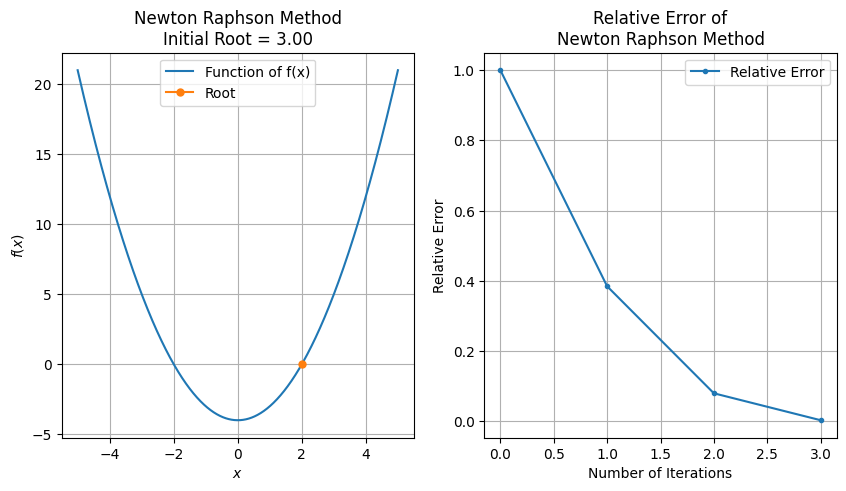

In [42]:
a,b = -5,5
x = np.linspace(a,b,1000)
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].plot(x,f(x), label='Function of f(x)')
ax[0].plot(xroot,f(xroot), marker='.', markersize=10, label='Root')
ax[0].set_axisbelow(True)
ax[0].grid()
ax[0].legend()
ax[0].set_title('Newton Raphson Method\nInitial Root = %.2f' % xn)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')

ax[1].plot(e_rels, marker='.', label='Relative Error')
ax[1].set_axisbelow(True)
ax[1].grid()
ax[1].legend()
ax[1].set_title('Relative Error of\nNewton Raphson Method')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Relative Error')


The result exhibits the good result ($f(x=2) = 0$) where the approximation root is solved perfectly when the initial root guess is 3 and the final relative error is 0.000005 after three iterations. Since the function has two solutions analytically $-2$ and $2$, then We try to give the initial root guess is -3 as follows.

In [43]:
e_tol = 1e-5
e_rel = 1
xn_2 = -3

xroot_2, e_rel_2, e_rels_2 = newtonraphson(f,fd,xn_2,e_rel,e_tol)

print('The approximation root is: %f' % xroot_2)
print('The relative error is: %f' % e_rel_2)

The approximation root is: -2.000000
The relative error is: 0.000005


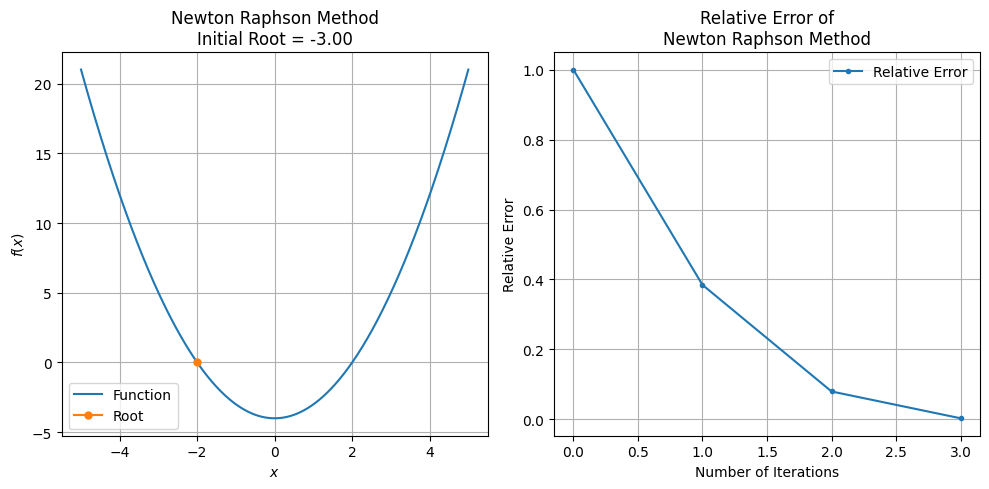

In [44]:
a,b = -5,5
x = np.linspace(a,b,1000)
fx = f(x)
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].plot(x,fx, label='Function')
ax[0].plot(xroot_2,f(xroot_2), marker='.', markersize=10, label='Root')
ax[0].set_axisbelow(True)
ax[0].grid()
ax[0].legend()
ax[0].set_title('Newton Raphson Method\nInitial Root = %.2f' % xn_2)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')

ax[1].plot(e_rels_2, marker='.', label='Relative Error')
ax[1].set_axisbelow(True)
ax[1].grid()
ax[1].legend()
ax[1].set_title('Relative Error of\nNewton Raphson Method')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Relative Error')
plt.tight_layout()


Nice, the root has been solved perfectly as we expected to be $-2$ with the relative error is 0.000005 after three iterations. Now, we try to set the initial root guess more higher than previous two, where the $x_n = 10$

In [45]:
e_tol = 1e-5
e_rel = 1
xn_3 = 10

xroot_3, e_rel_3, e_rels_3 = newtonraphson(f,fd,xn_3,e_rel,e_tol)

print('The approximation root is: %f' % xroot_3)
print('The relative error is: %f' % e_rel_3)

The approximation root is: 2.000000
The relative error is: 0.000005


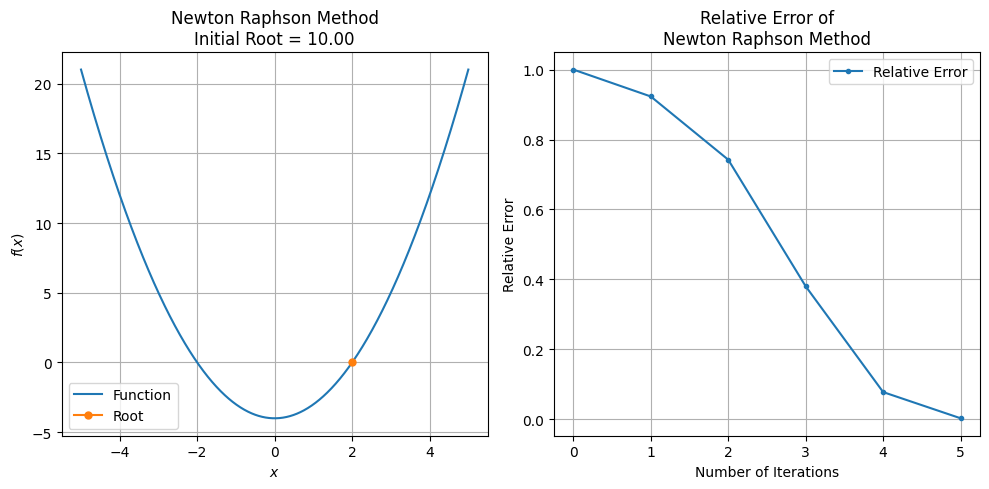

In [46]:
a,b = -5,5
x = np.linspace(a,b,1000)
fx = f(x)
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].plot(x,fx, label='Function')
ax[0].plot(xroot_3,f(xroot_3), marker='.', markersize=10, label='Root')
ax[0].set_axisbelow(True)
ax[0].grid()
ax[0].legend()
ax[0].set_title('Newton Raphson Method\nInitial Root = %.2f' % xn_3)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')

ax[1].plot(e_rels_3, marker='.', label='Relative Error')
ax[1].set_axisbelow(True)
ax[1].grid()
ax[1].legend()
ax[1].set_title('Relative Error of\nNewton Raphson Method')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Relative Error')
plt.tight_layout()


Perfect, the estimation root has been captured nicely with the relative error is 0.000005. When the initial root guess was adjusted higher than previous one, the iteration number is also increased. For this case, after five iterations, the root is found. How about we adjust the $x_n = -10$?

In [47]:
e_tol = 1e-5
e_rel = 1
xn_4 = -10

xroot_4, e_rel_4, e_rels_4 = newtonraphson(f,fd,xn_4,e_rel,e_tol)

print('The approximation root is: %f' % xroot_4)
print('The relative error is: %f' % e_rel_4)

The approximation root is: -2.000000
The relative error is: 0.000005


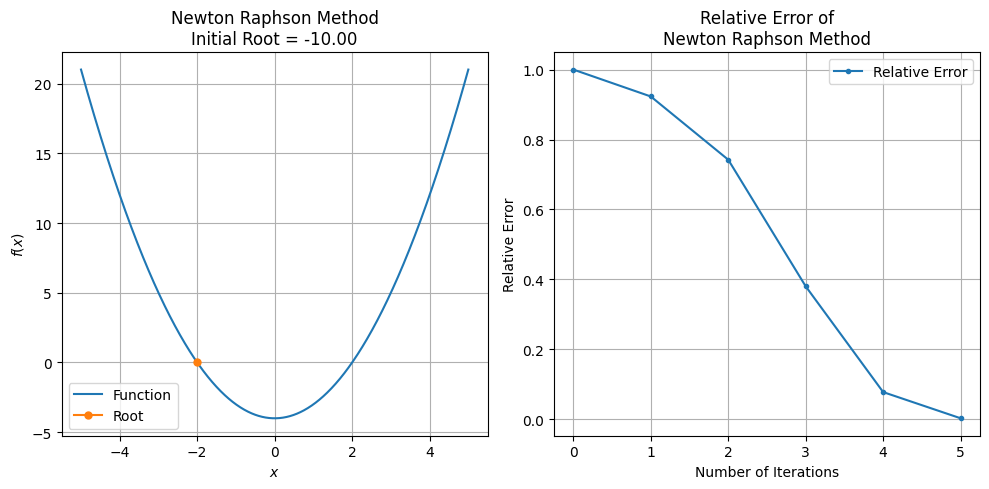

In [48]:
a,b = -5,5
x = np.linspace(a,b,1000)
fx = f(x)
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].plot(x,fx, label='Function')
ax[0].plot(xroot_4,f(xroot_4), marker='.', markersize=10, label='Root')
ax[0].set_axisbelow(True)
ax[0].grid()
ax[0].legend()
ax[0].set_title('Newton Raphson Method\nInitial Root = %.2f' % xn_4)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')

ax[1].plot(e_rels_4, marker='.', label='Relative Error')
ax[1].set_axisbelow(True)
ax[1].grid()
ax[1].legend()
ax[1].set_title('Relative Error of\nNewton Raphson Method')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Relative Error')
plt.tight_layout()


The result is the same, the root is found after five iterations with the root is $-2$ where the relative error is 0.000005 for this case.

### Case 2

There is a function of $f(x) = x^2 + 4x + 4 = 0$. Find its root!. We now, by analytical solution, this function has the two solutions of root of $-2$ with the same sign. Hence, the root lies in the negative direction.

The first derivative of this function is

$f'(x) = 2x + 4x$

In [49]:
f2 = lambda x: x**2 + 4*x + 4
fd2 = lambda x: 2*x + 4

e_tol = 1e-5
e_rel = 1
xn_5 = -3

xroot_5, e_rel_5, e_rels_5 = newtonraphson(f2,fd2,xn_5,e_rel,e_tol)

print('The approximation root is: %f' % xroot_5)
print('The relative error is: %f' % e_rel_5)

The approximation root is: -2.000015
The relative error is: 0.000008


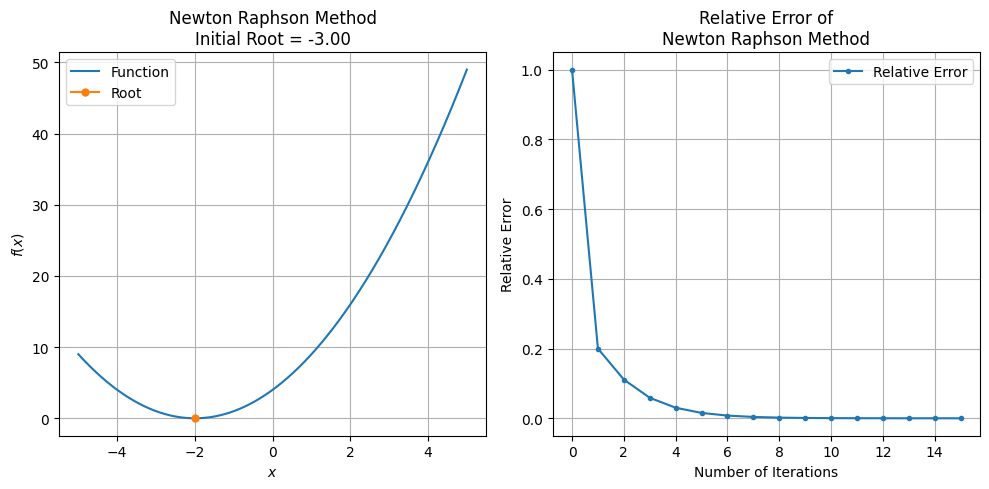

In [50]:
a,b = -5,5
x = np.linspace(a,b,1000)
fx = f2(x)
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].plot(x,fx, label='Function')
ax[0].plot(xroot_5,f2(xroot_5), marker='.', markersize=10, label='Root')
ax[0].set_axisbelow(True)
ax[0].grid()
ax[0].legend()
ax[0].set_title('Newton Raphson Method\nInitial Root = %.2f' % xn_5)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')

ax[1].plot(e_rels_5, marker='.', label='Relative Error')
ax[1].set_axisbelow(True)
ax[1].grid()
ax[1].legend()
ax[1].set_title('Relative Error of\nNewton Raphson Method')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Relative Error')
plt.tight_layout()


The result gives the perfect root estimation. The same function has been analysed to solve its root by using the [Bisection Method](https://notes.auliakhalqillah.com/en/latest/Bisection%20Method.html), but the root can not be solved. However, the Newton-Raphson method capable to solve the root of this function. This is due to the Newton-Raphson is not limit to the condition as the Bisection Method, where the Newton-Raphson approach make use of the tangent line to estimate the root of the function, where the tangent line is approximated from the first derivative of a given function where the assumption that the residual between the initial root ($x_0$) and the expected root ($x_r$) is very small.



By this experiments, we can conclude that

1. The Newton-Raphson method is robust method than the Bisection Method to solve the nonlinear equation, although it cost to the high number of iterations.
2. The Newton-Raphson method requires the first derivative function. It could be challenge when we are facing a complex nonlinear equation and deriving its derivative function.